# Keras Neural Networks

This is an example of how to use Keras to create a simple neural network. The code for this example was (shamelessly) lifted straight off of the Keras source code [here](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py).

Keras is essentially a wrapper for tensorflow (or theano). It makes it super easy to build and train a wide range of neural networks. Here, we'll train our neural network to recognize MNIST digits.

In [36]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for our network
batch_size = 128
num_classes = 10
epochs = 20

Keras has many built-in functions such as `to_categorical` that makes data manipulation very easy. Here we download the mnist dataset (using a built-in Keras function) and then preprocess it:

In [ ]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Building a network in Keras is incredibly straight forward. Just instantiate a `Sequential` object and then use `.add` to add layers to you network.

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

To train your model, just use use the `.fit` function. If `verbose=1`, then Keras prints out pretty summaries of how your network is doing while training

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction: [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
Actual: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


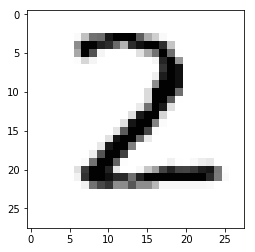

In [41]:
def predict(n):
    """Predict the nth test data sample using the model"""
    print("Prediction: " + str(np.round(model.predict(np.expand_dims(x_test[n], 0)), 2)))
    print("Actual: " + str(y_test[n]))
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    plt.show()
    
predict(2354)